In [1]:
import pandas as pd

employment_filename = 'resources/lesson2/employment_above_15.csv'
female_completion_filename = 'resources/lesson2/female_completion_rate.csv'
male_completion_filename = 'resources/lesson2/male_completion_rate.csv'
gdp_per_capita_filename = 'resources/lesson2/gdp_per_capita.csv'
life_expectancy_filename = 'resources/lesson2/life_expectancy.csv'

employment = pd.read_csv(employment_filename)
female_completion = pd.read_csv(female_completion_filename)
male_completion = pd.read_csv(male_completion_filename)
gdp_per_capita = pd.read_csv(gdp_per_capita_filename)
life_expectancy = pd.read_csv(life_expectancy_filename)
print "employment: {}".format(len(employment))
print "female_completion: {}".format(len(female_completion))
print "male_completion: {}".format(len(male_completion))
print "gdp_per_capita: {}".format(len(gdp_per_capita))
print "life_expectancy: {}".format(len(life_expectancy))

employment: 178
female_completion: 275
male_completion: 275
gdp_per_capita: 275
life_expectancy: 244


In [2]:
employment = employment.set_index("Country")
female_completion = female_completion.set_index("Country")
male_completion = male_completion.set_index("Country")
gdp_per_capita = gdp_per_capita.set_index("Country")
life_expectancy = life_expectancy.set_index("Country")

In [3]:
%pylab inline
import seaborn as sns
# print employment.columns.values
# print employment.index.values

# print employment.describe() # Describe each column

average_employment_by_year = employment.mean(axis="index")
print "average_employment_by_year"
print average_employment_by_year.describe()
# average_employment_by_year.plot(title="average_employment_by_year")

average_employment_by_country = employment.mean(axis="columns")
print "average_employment_by_country"
print average_employment_by_country.describe()
# average_employment_by_country.plot(title="average_employment_by_country")

Populating the interactive namespace from numpy and matplotlib
average_employment_by_year
count    17.000000
mean     57.805684
std       0.321294
min      57.396067
25%      57.622472
50%      57.732022
75%      57.822472
max      58.635955
dtype: float64
average_employment_by_country
count    178.000000
mean      57.805684
std       10.762482
min       30.652941
25%       51.402941
50%       56.885294
75%       64.279412
max       84.182353
dtype: float64


In [4]:
# print female_completion.index.values
# print female_completion.columns.values
# print female_completion.loc["United States"]

def summarize_country_info(country):
    summarized_df = pd.DataFrame({"female_completion":female_completion.loc[country],
                              "male_completion":male_completion.loc[country],
                              "employment":employment.loc[country],
                              "gdp_per_capita":gdp_per_capita.loc[country],
                              "life_expectancy":life_expectancy.loc[country]
                             })
    return summarized_df

summarized_info_for_us = summarize_country_info("United States")

### Slice by Column
# summarized_info_for_us['employment'].plot()

### Slice by Index
# print summarized_info_for_us.loc['2000':'2010']

### Slice by Index and Column
# summarized_info_for_us.loc['2000':'2010',['employment']].plot()

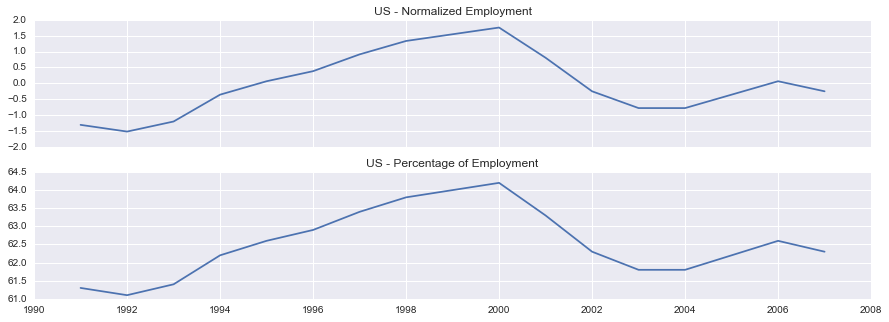

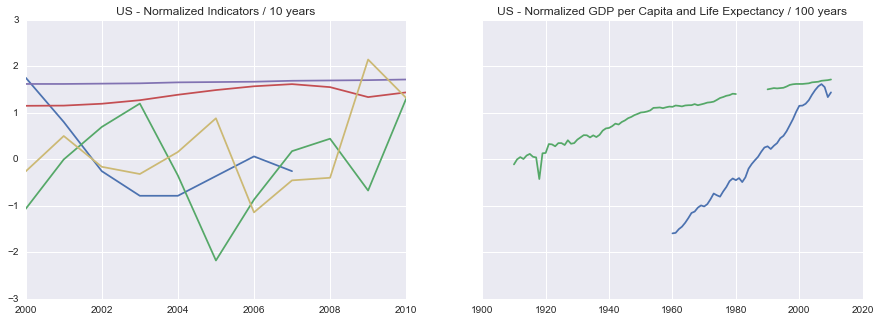

In [5]:
def normalize(df):
    df_norm = (df - df.mean()) / df.std()
    return df_norm

normalized_info_for_us = normalize(summarized_info_for_us)

fig, (a,b) = plt.subplots(2,1,sharex=True,figsize=(15,5))
a.plot(normalized_info_for_us.loc['1990':'2010',['employment']])
a.set_title("US - Normalized Employment")
b.plot(summarized_info_for_us.loc['1990':'2010',['employment']])
b.set_title("US - Percentage of Employment")

fig, (c,d) = plt.subplots(1,2,sharey=True,figsize=(15,5))
c.plot(normalized_info_for_us.loc['2000':'2010'])
c.set_title("US - Normalized Indicators / 10 years")

d.plot(normalized_info_for_us.loc['1910':'2010',['gdp_per_capita', 'life_expectancy']])
d.set_title("US - Normalized GDP per Capita and Life Expectancy / 100 years")
